# U.S. GDP Trend Analysis using World Bank Data

GDP (Gross Domestic Product) is one of the most important economic indicators used to gauge the health of a country's economy. In this project, we analyze the historical GDP trends of the United States from 1960 to 2022 using data from the World Bank. The goal is to answer questions about U.S. economic growth, identify periods of recession or strong performance, and extract insights from long-term trends.

This project follows a structured data analysis process, from importing and preparing the data, to analyzing and visualizing it.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


# Load GDP data
df = pd.read_csv("API_NY.GDP.MKTP.CD_DS2_en_csv_v2_19294.csv", skiprows=4)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.481857e+09,2.929447e+09,3.279344e+09,3.648573e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.421063e+10,2.496398e+10,2.707880e+10,3.177575e+10,3.028579e+10,3.381317e+10,...,8.289428e+11,9.729989e+11,1.012306e+12,1.009721e+12,9.333918e+11,1.085745e+12,1.191423e+12,1.245472e+12,NaN,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426000e+10,1.449724e+10,1.723305e+10,NaN,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.190495e+10,1.270788e+10,1.363076e+10,1.446909e+10,1.580376e+10,1.692109e+10,...,6.943610e+11,6.878492e+11,7.704950e+11,8.264838e+11,7.898017e+11,8.493124e+11,8.839739e+11,7.991060e+11,NaN,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.276162e+10,7.369015e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.043997e+11,8.482465e+10,NaN,NaN


### Dataset Overview

The dataset contains GDP (current US$) data for all countries from 1960 to 2022. Each row represents a country, and each column from 1960 onward represents the GDP for that year.

We will focus exclusively on the United States and perform trend analysis and visual exploration.

In [16]:
# Filter for the US only
us_gdp = df[df["Country Name"] == "United States"]
us_gdp = us_gdp.loc[:, "1960":"2022"].T  # Transpose for better year-based analysis
us_gdp.columns = ["GDP (US$)"]
us_gdp.index.name = "Year"
us_gdp = us_gdp.reset_index()
us_gdp.head()

,Year,GDP (US$)
0,1960,5.419886e+11
1,1961,5.619403e+11
2,1962,6.036394e+11
3,1963,6.370586e+11
4,1964,6.841446e+11


# U.S. GDP Trend Analysis Using World Bank Data

This project explores the historical trend of the United States Gross Domestic Product (GDP) using data from the World Bank. The dataset provides GDP values from 1960 to 2022 in current U.S. dollars. By analyzing this data, we aim to uncover patterns of economic growth, identify significant shifts, and answer key questions about the U.S. economy over the past six decades.

### Key Questions to Explore

1. What is the overall trend of U.S. GDP from 1960 to 2022?
2. What are the top 5 highest GDP years? What are the lowest?
3. What was the GDP growth rate each year?
4. What is the average GDP per decade?
5. Which decade had the fastest GDP growth?
6. What was the impact of the 2008 crisis and COVID-19 on GDP?
7. What is the overall compound annual growth rate (CAGR) from 1960 to 2022?

### Q1: What is the overall trend of U.S. GDP from 1960 to 2022?

The first step in understanding the U.S. economy is visualizing the GDP growth over time. This helps identify long-term trends, patterns, and anomalies, such as recessions or rapid expansions.

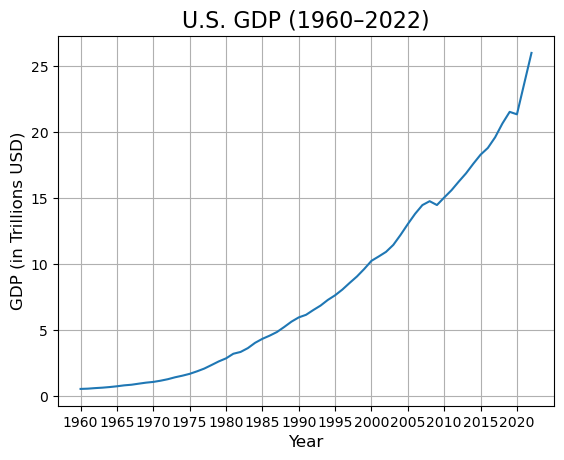

In [30]:
# Plot the GDP trend
plt.plot(us_gdp["Year"], us_gdp["GDP (US$)"] / 1e12)
plt.title("U.S. GDP (1960–2022)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("GDP (in Trillions USD)", fontsize=12)
plt.grid(True)
plt.xticks(ticks=range(1960, 2025, 5))
plt.show()

### Q2: What are the top 5 and bottom 5 years in terms of U.S. GDP?

By identifying the best and worst GDP years, we can pinpoint major turning points in the U.S. economy, including times of crisis or significant growth.

In [18]:
# Top 5 years
top_5 = us_gdp.sort_values(by="GDP (US$)", ascending=False).head()
print("Top 5 GDP Years:")
print(top_5)

# Bottom 5 years
bottom_5 = us_gdp.sort_values(by="GDP (US$)").head()
print("\nBottom 5 GDP Years:")
print(bottom_5)

Top 5 GDP Years:
    Year     GDP (US$)
62  2022  2.600689e+13
61  2021  2.368117e+13
59  2019  2.153998e+13
60  2020  2.135410e+13
58  2018  2.065652e+13

Bottom 5 GDP Years:
   Year     GDP (US$)
0  1960  5.419886e+11
1  1961  5.619403e+11
2  1962  6.036394e+11
3  1963  6.370586e+11
4  1964  6.841446e+11


### Q3: What was the GDP growth rate each year?

To measure how the U.S. economy changed year to year, we calculate the percentage change in GDP. This helps identify rapid expansions, contractions, or years of stagnation.

In [19]:
# Calculate year by year percentage change
us_gdp["GDP Growth Rate (%)"] = us_gdp["GDP (US$)"].pct_change() * 100

# Display the first few w growth rate
us_gdp.head(10)

,Year,GDP (US$),GDP Growth Rate (%)
0,1960,5.419886e+11,NaN
1,1961,5.619403e+11,3.681207
2,1962,6.036394e+11,7.420557
3,1963,6.370586e+11,5.536275
4,1964,6.841446e+11,7.391168
5,1965,7.419049e+11,8.442695
6,1966,8.130328e+11,9.587199
7,1967,8.596200e+11,5.730061
8,1968,9.402250e+11,9.376813
9,1969,1.017438e+12,8.212202


We can also visualize the annual GDP growth rate to easily spot spikes or drops.

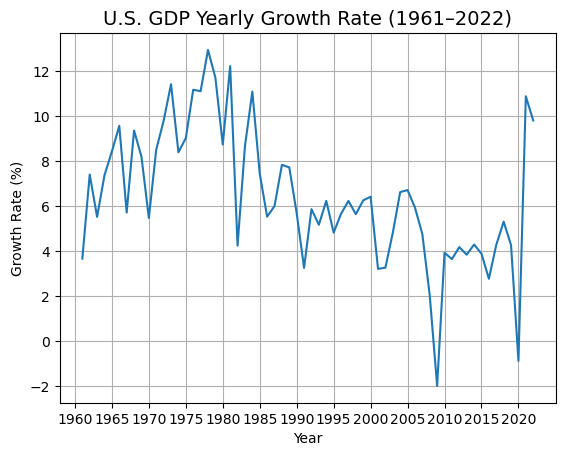

In [29]:
# Plot growth rate

plt.plot(us_gdp["Year"], us_gdp["GDP Growth Rate (%)"])
plt.title("U.S. GDP Yearly Growth Rate (1961–2022)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.grid(True)
plt.xticks(ticks=range(1960, 2025, 5))
plt.show()

### Q4: What is the average U.S. GDP per decade?

Grouping GDP data by decade helps us understand how the U.S. economy evolved over longer time periods and smooth out short-term fluctuations.

In [23]:
# Create a new column for decade
us_gdp["Year"] = us_gdp["Year"].astype(int)
us_gdp["Decade"] = (us_gdp["Year"] // 10) * 10

# Group by decade and calculate avg GDP
decade_avg = us_gdp.groupby("Decade")["GDP (US$)"].mean().reset_index()

# Convert GDP to trillions
decade_avg["GDP (Trillions)"] = decade_avg["GDP (US$)"] / 1e12
decade_avg = decade_avg[["Decade", "GDP (Trillions)"]]
decade_avg

,Decade,GDP (Trillions)
0,1960,0.740099
1,1970,1.710696
2,1980,4.173163
3,1990,7.577181
4,2000,12.601257
5,2010,18.030003
6,2020,23.680723


The following bar chart shows the average GDP per decade in trillions of U.S. dollars.

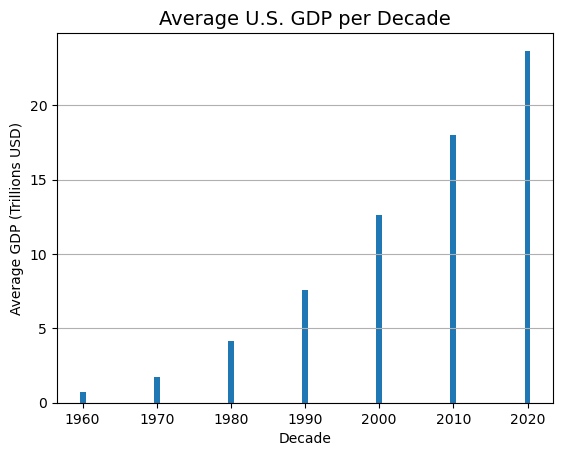

In [24]:
# Plot the avg GDP per decade
plt.bar(decade_avg["Decade"], decade_avg["GDP (Trillions)"])
plt.title("Average U.S. GDP per Decade", fontsize=14)
plt.xlabel("Decade")
plt.ylabel("Average GDP (Trillions USD)")
plt.xticks(decade_avg["Decade"])
plt.grid(axis="y")
plt.show()

### Q5: Which decade had the fastest GDP growth?

To measure economic momentum across decades, we compute the percent change in average GDP from one decade to the next. This helps identify when the US economy accelerated the most.

In [25]:
# Calculate decade by decade GDP growth rate (in trillions)
decade_avg["Growth Rate (%)"] = decade_avg["GDP (Trillions)"].pct_change() * 100

# Drop the first row since its growth is NaN
fastest_growth = decade_avg.dropna().sort_values("Growth Rate (%)", ascending=False)
fastest_growth

,Decade,GDP (Trillions),Growth Rate (%)
2,1980,4.173163,143.945393
1,1970,1.710696,131.144086
3,1990,7.577181,81.569244
4,2000,12.601257,66.305354
5,2010,18.030003,43.080982
6,2020,23.680723,31.340652


The table below shows the growth rates by decade. The highest growth rate indicates the fastest expanding decade.

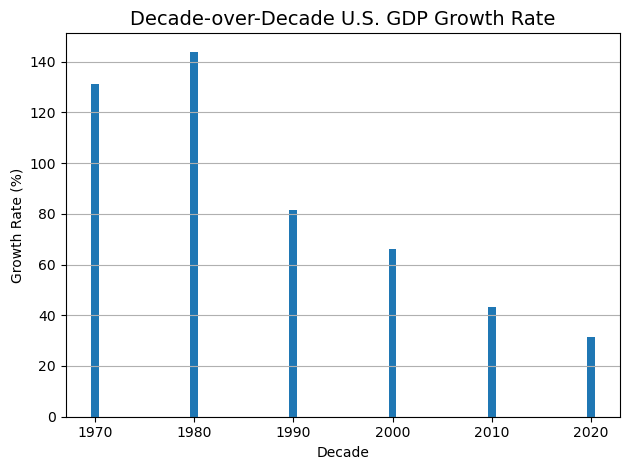

In [26]:
# Plot growth rate by decade
plt.bar(fastest_growth["Decade"], fastest_growth["Growth Rate (%)"])
plt.title("Decade-over-Decade U.S. GDP Growth Rate", fontsize=14)
plt.xlabel("Decade")
plt.ylabel("Growth Rate (%)")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

### Q6: How did the 2008 financial crisis and COVID-19 pandemic affect U.S. GDP?

Economic crises like the 2008 housing market collapse and the 2020 COVID-19 pandemic had major impacts on the U.S. economy. We examine the year-over-year GDP changes around 2008–2009 and 2019–2020 to understand how severe the declines were.

In [27]:
# Select the years of we care about
crisis_years = us_gdp[us_gdp["Year"].isin([2007, 2008, 2009, 2019, 2020, 2021])]

# Display GDP and growth rate for those years
crisis_years[["Year", "GDP (US$)", "GDP Growth Rate (%)"]]

,Year,GDP (US$),GDP Growth Rate (%)
47,2007,1.447423e+13,4.767406
48,2008,1.476986e+13,2.042485
49,2009,1.447807e+13,-1.975611
59,2019,2.153998e+13,4.276936
60,2020,2.135410e+13,-0.862939
61,2021,2.368117e+13,10.897511


### Q7: What is the compound annual growth rate (CAGR) of U.S. GDP from 1960 to 2022?

CAGR shows the average annual rate at which GDP grew over the entire period, assuming steady growth. It’s useful for summarizing long-term performance.

In [28]:
# Get start and end values
start_year = 1960
end_year = 2022
start_value = us_gdp.loc[us_gdp["Year"] == start_year, "GDP (US$)"].values[0]
end_value = us_gdp.loc[us_gdp["Year"] == end_year, "GDP (US$)"].values[0]
n_years = end_year - start_year

# Calculate CAGR
cagr = ((end_value / start_value) ** (1 / n_years) - 1) * 100
print(f"Compound Annual Growth Rate (1960–2022): {cagr:.2f}%")

Compound Annual Growth Rate (1960–2022): 6.44%


### Final Insights

After analyzing over 60 years of U.S. GDP data, a few big takeaways stood out. First, the overall trend is clear: the U.S. economy has grown massively since 1960, going from around $500 billion to over $25 trillion in 2022. That’s a huge jump and shows how much the country’s economic power has expanded.

The fastest growing decade was the 1980s, which saw a big boost in GDP compared to the previous decade. On the flip side, two major drops in GDP happened during the 2008 financial crisis and the COVID-19 pandemic in 2020. Those years showed just how quickly economic growth can be interrupted by real world events.

Even with those setbacks, the long-term picture is strong. The U.S. maintained a compound annual growth rate (CAGR) of about **6.44%** from 1960 to 2022. That steady average over six decades shows the overall resilience of the economy.

This project helped me understand not just how to clean and analyze data, but also how real events like recessions and pandemics leave a clear mark on economic numbers. It was cool to connect code and visuals to real life history.